In [ ]:
NAME = 'Ati tesakulsiri'
ID = 'st123009'

# Lab 08: Deep Learning Part I: Fully Connected Neural Networks

In class, we have developed the mathematics and programming techniques for binary classification using fully connected neural networks
having one or more hidden layers.

Today, we'll expand on that to consider (small) image classification using again fully connected neural networks with a multinomial
(softmax) output layer.

In [1]:
# !pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## What is Deep learning doing?

Let's try to classify the deep learning in this <link>[link](https://playground.tensorflow.org/
)</link>. The page can observe your network visualization when learning it.

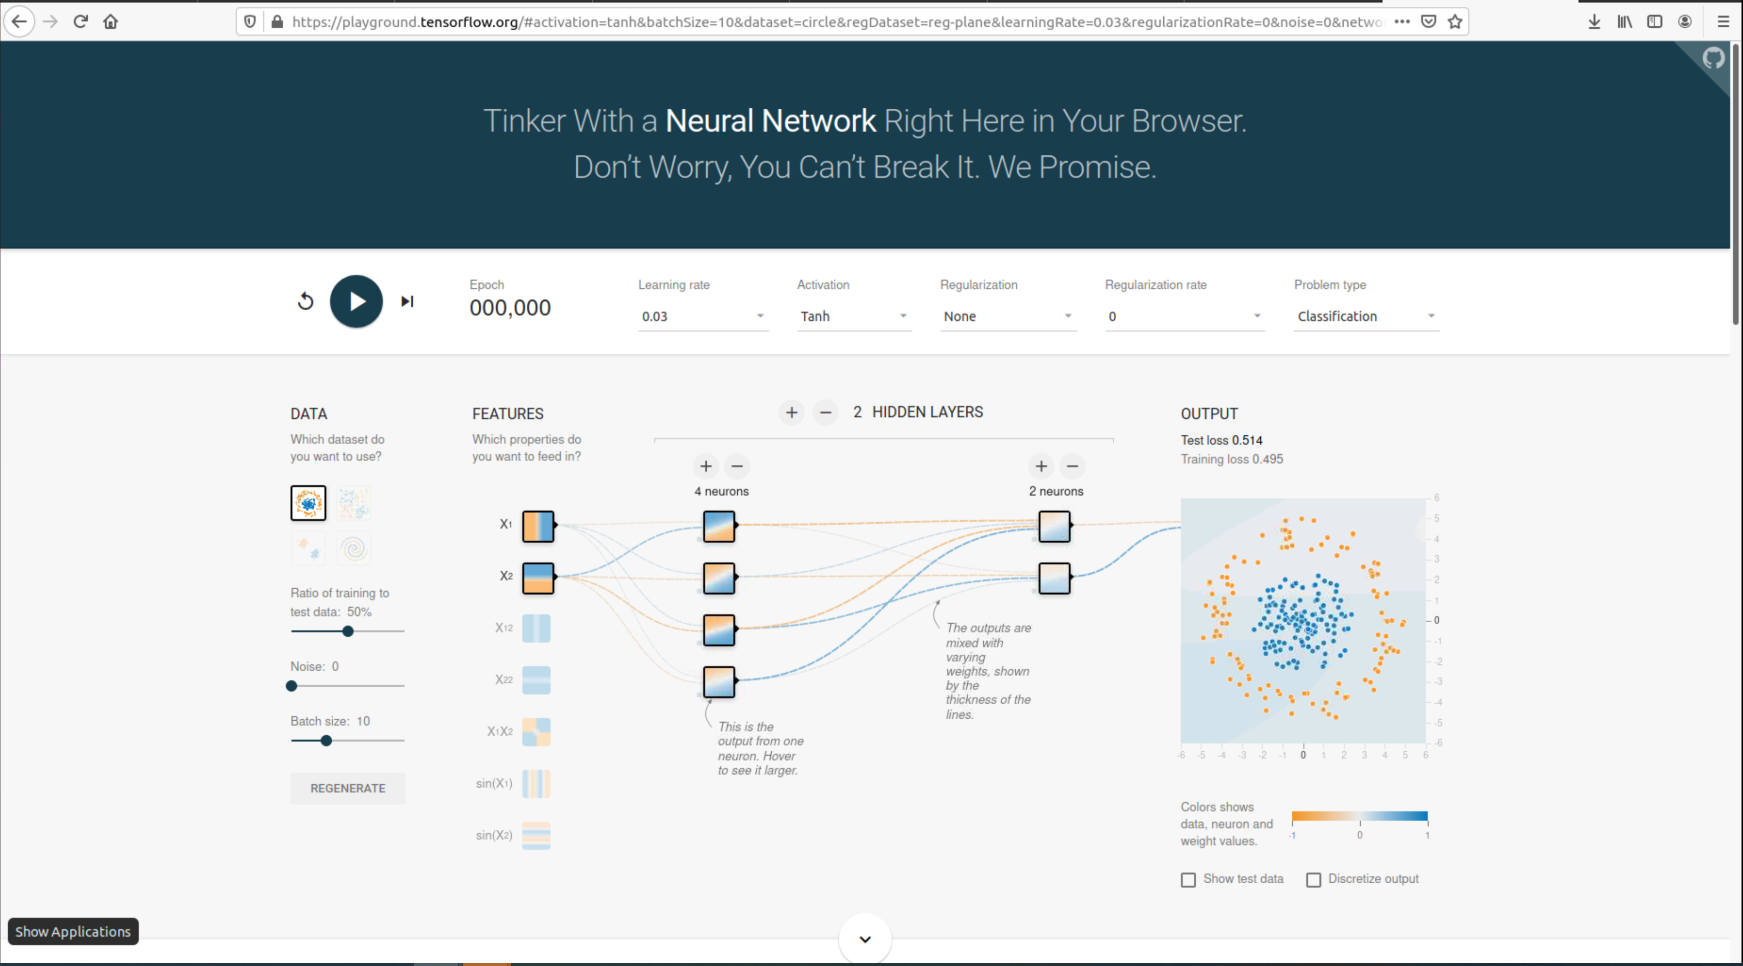

Select The initial setup of data (at the left) as:
- Ratio of training to test data: 90%
- Noise: 5
- Batch size: 4

Press run and observe the result.

## Exercise 1 (10 points)

Select the spiral shape (the 4th shape). Select The initial setup of data (at the left) as:
- Ratio of training to test data: 90%
- Noise: 35
- Batch size: 4

Try to make the best separating result. Capture your **FULL** screen and input below

Capture scrren here!
<img src = 'reseutEx1.png'>

**Expect result**:

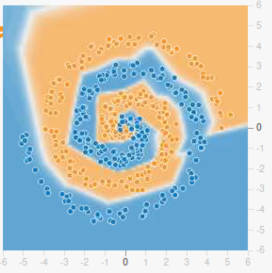

#### Special coding

You can make jupyter in GUI (it also can export to HTML website).

In [5]:
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

# defining some widgets
lblQ1 = widgets.Label(
        value="Q1) What is your learning rate?")
rdoQ1 = widgets.RadioButtons(
        options=['0.00001', '0.0001', '0.001', '0.003', '0.01', '0.03', '0.1', '0.3', '1', '3', '10',],
        value='0.03',
        description='\t',
        disabled=False)

lblQ2 = widgets.Label(
        value="Q2) What is your activation function in last layer?")
rdoQ2 = widgets.RadioButtons(
        options=['ReLu', 'Tanh', 'Sigmoid', 'Linear',],
        value='Tanh',
        description='\t',
        disabled=False)

lblQ3 = widgets.Label(
        value="Q3) What is problem type?")
rdoQ3 = widgets.RadioButtons(
        options=['Classification', 'Regression'],
        value='Classification',
        description='\t',
        disabled=False)

lblQ4 = widgets.Label(value="Q4) Which input do you use?")
chkQ4_1 = widgets.Checkbox(
           description='$X_1$',
           value=True)
chkQ4_2 = widgets.Checkbox(
           description='$X_2$',
           value=True)
chkQ4_3 = widgets.Checkbox(
           description='$X_1^2$',)
chkQ4_4 = widgets.Checkbox(
           description='$X_1X_2$',)
chkQ4_5 = widgets.Checkbox(
           description='$X_2^2$',)
chkQ4_6 = widgets.Checkbox(
           description='sin$(X_1)$',)
chkQ4_7 = widgets.Checkbox(
           description='sin$(X_2)$',)
chkQ4 = widgets.VBox([chkQ4_1, chkQ4_2, chkQ4_3, chkQ4_4, chkQ4_5, chkQ4_6, chkQ4_7])

lblQ5 = widgets.Label(value="Q5) How many hidden layers do you use?")
txtQ5 = widgets.IntText(
       value=0,
       description='hidden layers', )

lblQ6 = widgets.Label(value="Q6) Explain your nodes for each layer")
txtQ6 = widgets.Textarea(
       value='',
       description='Explain here', )

box = widgets.VBox([lblQ1, rdoQ1, lblQ2, rdoQ2, lblQ3, rdoQ3, lblQ4, chkQ4, lblQ5, txtQ5, lblQ6, txtQ6,])

box

In [8]:
q4str = ""
if chkQ4_1.value:
    q4str += " X1,"
if chkQ4_2.value:
    q4str += " X2,"
if chkQ4_3.value:
    q4str += " X1^2,"
if chkQ4_4.value:
    q4str += " X1X2,"
if chkQ4_5.value:
    q4str += " X2^2,"
if chkQ4_6.value:
    q4str += " sin(X1),"
if chkQ4_7.value:
    q4str += " sin(X2),"
print("Use input features:", q4str)
print("Problem type:", rdoQ3.value)
print("The last activation function:", rdoQ2.value)
print("Learning rate:", rdoQ1.value)
print("Use", txtQ5.value, "hidden layers. Each layer contains", txtQ6.value)

Use input features:  X1, X2, X1^2, X2^2,
Problem type: Classification
The last activation function: Tanh
Learning rate: 0.03
Use 3 hidden layers. Each layer contains 6 nodes to seperate the spiral dataset.


## MNIST Data

An image is a 2D array of pixels. Pixels can be scalar intensities (for a grayscale / black and white image) or a vector indicating a
point in a color space such as RGB or HSV.

Today we'll consider 8x8 grayscale images of digits from the famous "MNIST" dataset, which was considered a benchmark for machine learning algorithms
up to the early 2000s, before the advent of large-scale image classification datasets.

This dataset in SciKit-Learn has 10 classes, with 180 samples per class in most cases, for a total of 1797 samples.

Let's load the dataset and check the y output.

In [98]:
# %reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [99]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load data

data = load_digits()

y_indices = data.target
print(y_indices[100])

4


## One hot encoding

As you can see, the y output is index value. To use the value for classify in deep learning, you need to convert it to one hot. 

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In this time, you need to convert the index value to be

$$0 \rightarrow [1, 0,0,0,0,0,0,0,0,0]$$
$$1  \rightarrow  [0, 1,0,0,0,0,0,0,0,0]$$
$$2  \rightarrow  [0, 0,1,0,0,0,0,0,0,0]$$
$$3  \rightarrow  [0, 0,0,1,0,0,0,0,0,0]$$
$$4  \rightarrow  [0, 0,0,0,1,0,0,0,0,0]$$
$$5  \rightarrow  [0, 0,0,0,0,1,0,0,0,0]$$
$$6  \rightarrow  [0, 0,0,0,0,0,1,0,0,0]$$
$$7  \rightarrow  [0, 0,0,0,0,0,0,1,0,0]$$
$$8  \rightarrow  [0, 0,0,0,0,0,0,0,1,0]$$
$$9  \rightarrow  [0, 0,0,0,0,0,0,0,0,1]$$

In [100]:
def convert_to_one_hot(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, int(y[i])] = 1
    return y_vect

# Convert target indices to one-hot representation
y = convert_to_one_hot(y_indices)
print(y[100])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Let's see the X input shape.

In [101]:
X = np.matrix(data.data)
print(X.shape)

(1797, 64)


You can see that the row number is the index of mnist data, and the column number is the mnist data of 64 pixels which is ready for using it as the fully connect network. To show the image, you need to reshape the 64 pixels to be $8\times8$.

Text(0.5, 1.0, 'Example MNIST sample (category 0)')

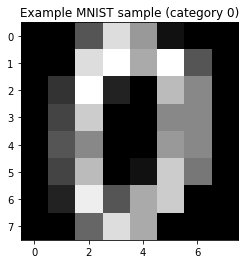

In [102]:
data_size = X.shape[0]
x_area = X.shape[1]

# Plot an example
plt.imshow(np.reshape(X[0,:],(8,8)), 'gray')
plt.title('Example MNIST sample (category %d)' % y_indices[0])

##  Reshaping arrays

Actually, normally when you load an image to use in your fully-connect neural network, you need to reshape the image arrays into vector of shape $(length\times height \times depth, 1)$ as example below.

<img src="image2vector_kiank.png" title="image2vector_kiank" style="width: 600px;" />

Two common numpy functions used in reshape are np.shape and np.reshape().

- <code>X.shape</code> is used to get the shape (dimension) of a matrix/vector $X$.
- <code>X.reshape(...)</code> is used to reshape $X$ into some other dimension.

In [103]:
def image2vector(image):
    """
    Convert image with 3 dimensions to become vector of (size, 1)
    """
    v = image.reshape(image.shape[0]*image.shape[1]*image.shape[2],1)
    # v = image.reshape(-1,1)       # another one solution
    return v

image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print ("image2vector(image) = " + str(image2vector(image)))

image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


## Hand-Coded Fully Connected Neural Network

Let's modify our code from class to work with this dataset and run 100 epochs of training.
The main change is to use a one-hot encoding of the 10 classes at the output layer and to use
the softmax activation function at the output. Some minor changes are required to calculate multinomial
cross entropy loss rather than binary cross entropy loss.

<img src="nn_mnist.jpeg" title="mnist neural network" style="width: 600px;" />

*Note*: change SoftMin to be SoftMax

In [104]:
import random
import warnings
warnings.filterwarnings("ignore")

#### Normalize each input feature

Change the input X to be normalize vector. The normalize equation is

$$norm(X) = \frac{X-\bar{X}}{SD}$$

In [105]:
def normalize(X):
    M = X.shape[0]
    XX = X - np.tile(np.mean(X,0),[M,1])
    XX = np.divide(XX, np.tile(np.std(XX,0),[M,1]))
    return np.nan_to_num(XX, copy=True,nan=0.0)

XX = normalize(X)

#### Partion data into training and testing dataset

In deep learning, it is necessary for split your raw data to be 3 types:
1. Training set - Data for training and learn
2. Validate set - Data for test the network in each epoch or loop training.
3. Test set - Data for test the network in finalize after training. This can assume that if the network is going to use, what accuracy should be.

Spliting the training, validate, and test set need to make sure that
1. The data need to be random.
2. The validate and test set must be in the same as training set environment, but do not the same data from training set.
3. A lot of data of training set can make your model accurate, but need to make sure that the validate and test set cover your conditions.

Normally, we should split data in percentage. However, this is not fixed. You can adjust.
- 60% training, 20% validate, and 20% test for the data over 1 million set
- 80% training, 10% validate, and 10% test for otherwise.
- For the very low data (~1000 data), we could use validate and test set in the same data.

However, there are some trick about spliting the data when the data is too low, but we do not talk about it in here.

In [106]:
percent_train = .6

idx = np.arange(0,data_size)

random.shuffle(idx)
m_train = int(data_size * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:data_size+1]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];
y_test_indices = y_indices[test_idx]

#### Create some important activation functions

ReLu equation is written

$$ReLu(x) = \max(0,x)$$

Tanh equation is written

$$Tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$$

Sigmoid equation is written

$$Sigmoid(x) = \frac{1}{1+e^{-x}}$$

And Softmax equation is written

$$Softmax(x) = softmax([x_1,x_2,\cdots,x_n])=
\begin{bmatrix}
\frac{e^{x_1}}{\sum_j e^{x_j}} & \frac{e^{x_2}}{\sum_j e^{x_j}} & \cdots & \frac{e^{x_n}}{\sum_j e^{x_j}}
\end{bmatrix}$$

In [107]:
def ReLu(x):
    output = np.maximum(0,x)
    return output

def Tanh(x):
    x_p = np.exp(x)
    x_m = np.exp(-x)
    output = (x_p - x_m) / (x_p + x_m)
    return output

def Sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

def Softmax(x):
    exp_x = np.exp(x)
    output = exp_x/np.sum(exp_x)
    return output

#### Create network

Let's start with a 3-layer network with sigmoid activation functions, \
6 units in layer 1, and 5 units in layer 2.

In [108]:
h2 = 5
h1 = 6
W = [[], np.random.normal(0,0.1,[x_area,h1]),
         np.random.normal(0,0.1,[h1,h2]),
         np.random.normal(0,0.1,[h2,10])]
B = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
         np.random.normal(0,0.1,[10,1])]

act_funcs = [None, ReLu, Sigmoid, Softmax]

L = len(W)-1

#### Create Forward activation function

For input $x^{(i)}$, the forward propagation in each layer can be calculated by
$$z^{(i)}=W^Tx^{(i)}+b$$
$$\hat{y}^{(i)}=a^{(i)}=act(z^{(i)})$$

In [109]:
def forward_layer(w, b, X, act_func):
    z = w.T * X + b
    if act_func is not None:
        y_hat = act_func(z)
    else:
        y_hat = z
    return z, y_hat

In [110]:
# test function
X = np.array([[.9, 0.2, 0.1, -0.3, -0.7]]).T

w = np.array([[0.2, 0.1, 1, 3, 0.5]])
b = np.array([[1]])

z2, y_hat1 = forward_layer(w, 0.5, X, None)
z1, y_hat2 = forward_layer(w, b, X, Sigmoid)
z2, y_hat3 = forward_layer(w, 0.5, X, ReLu)
print('Linear output of y_hat1', y_hat1, ', y_hat2', y_hat2, 'and y_hat3', y_hat2)

Linear output of y_hat1 [[ 0.68]
 [ 0.52]
 [ 0.6 ]
 [-0.4 ]
 [ 0.15]] , y_hat2 [[0.7649478 ]
 [0.7349726 ]
 [0.75026011]
 [0.52497919]
 [0.65701046]] and y_hat3 [[0.7649478 ]
 [0.7349726 ]
 [0.75026011]
 [0.52497919]
 [0.65701046]]


#### Forward propagation

In [111]:
def forward_one_step(X, W, B, act_funcs):
    L = len(W)-1
    a = [X]
    z = [[]]
    delta = [[]]
    dW = [[]]
    db = [[]]
    for l in range(1,L+1):
        z_layer, a_layer = None, None
        ### BEGIN SOLUTION
        z_layer, a_layer = forward_layer(W[l], B[l], a[l-1], act_funcs[l])
        ### END SOLUTION
        z.append(z_layer)
        a.append(a_layer)
        # Just to give arrays the right shape for the backprop step
        delta.append([]); dW.append([]); db.append([])
    return a, z, delta, dW, db

In [112]:
def feed_forward(X,W,B, act_funcs):
    L = len(W)-1
    a = [X]
    z = [[]]
    delta = [[]]
    dW = [[]]
    db = [[]]
    for l in range(1,L+1):
        z_layer, a_layer = forward_layer(W[l], B[l], a[l-1], act_funcs[l])
        z.append(z_layer)
        a.append(a_layer)
    return a_layer

In [113]:
# test function

x_this = X_train[0,:].T

a, z, delta, dW, db = forward_one_step(x_this, W, B, act_funcs)
print('size of a', len(a), 'a[3] =', a[3])
print('size of z', len(z), 'z[3] =', z[3])

size of a 4 a[3] = [[0.10140353]
 [0.10498326]
 [0.09882618]
 [0.11456098]
 [0.09253478]
 [0.10047564]
 [0.10229738]
 [0.09312123]
 [0.09260257]
 [0.09919445]]
size of z 4 z[3] = [[-0.0270185 ]
 [ 0.00767456]
 [-0.05276387]
 [ 0.0949809 ]
 [-0.11854178]
 [-0.03621107]
 [-0.01824231]
 [-0.11222422]
 [-0.11780944]
 [-0.04904435]]


## Loss function

For softmax loss function, it is cross entropy loss. You can calculate as

$$\mathcal{L} = -\sum_{i=0}^n (y_i * \log\hat{y}_i)$$

In [114]:
def loss(y, yhat):
    l = - np.dot(y, np.log(yhat))
    return l

### Back propagation

Back propagation can be calculated as

$$\frac{\partial\mathcal{L}}{\partial z^{[l-1]} } =[W^{[l]}]^T \cdot \frac{ \partial\mathcal{L} }{\partial z^{[l]} } * {g^{[l-1]}}'(z^{[l-1]})$$

$$\frac{\partial\mathcal{L}}{\partial W^{[l]} } = \frac{ \partial\mathcal{L} }{\partial z^{[l]} } \cdot [a^{[l-1]}]^T$$

$$\frac{\partial\mathcal{L}}{\partial b^{[l]} } = \frac{ \partial\mathcal{L} }{\partial z^{[l]} }$$

When ${g^{[l-1]}}'$ is derivative activation function.

### derivative activation functions

First step of back propagation function, we need to calculate derivative of the activation functions that we use.

The Linear_derivative ($dl$) function is
$$dl(x) = [1]$$

The ReLu_derivative ($dReLu$) function is

$$dReLu(x)=
\left\{\begin{matrix}
1 & x > 0\\ 
0 & otherwise
\end{matrix}\right.$$

The Tanh_derivative ($dTanh$) function is

$$d\tanh(x) = 1 - \tanh^2(x)$$

The Sigmoid_derivative ($ds$) function is

$$dSigmoid(x) = Sigmoid(x)(1-Sigmoid(x))$$


In [115]:
def Linear_derivative(x):
    output = np.ones(x.shape)
    return output

def ReLu_derivative(x):
    output = (x > 0) * 1
    return output

def Tanh_derivative(x):
    t=Tanh(x)
    output = 1-t**2
    return output

def Sigmoid_derivative(x):
    s=Sigmoid(x)
    output = np.multiply(s,1-s)
    return output

#### Back propagation function

In [116]:
def back_propagation(y, a, z, W, dW, db, act_deri):
    '''
    Backprop step. Note that derivative of multinomial cross entropy
    loss is the same as that of binary cross entropy loss. See
    https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba
    for a nice derivation.
    '''
    L = len(W)-1
    
    delta[L] = a[L] - np.matrix(y_this).T
    for l in range(L,0,-1):
        db[l] = delta[l].copy()
        dW[l] = a[l-1] * delta[l].T
        if l > 1:
            delta[l-1] = np.multiply(act_deri[l-1](z[l-1]), W[l] * delta[l])
            
    return dW, db

Let's setup derivative activation function.

In [117]:
act_deri = [None, ReLu_derivative, Sigmoid_derivative, Softmax]

In [118]:
# test function
x_this = X_train[0,:].T
y_this = y_train[0,:]

a, z, delta, dW, db = forward_one_step(x_this, W, B, act_funcs)
dW, db = back_propagation(y_this, a, z, W, dW, db, act_deri)

lenW = [0, 64, 6, 5]
for i in range(4):
    assert len(dW[i]) == lenW[i]
    
print("dW", dW)
print("db", db)

dW [[], matrix([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  7.10404457e-04, -1.85881405e-04,
          0.00000000e+00,  0.00000000e+00, -1.61700592e-03],
        [ 0.00000000e+00,  9.13535547e-05, -2.39031821e-05,
          0.00000000e+00,  0.00000000e+00, -2.07936814e-04],
        [ 0.00000000e+00, -5.81170293e-04,  1.52066544e-04,
          0.00000000e+00,  0.00000000e+00,  1.32284616e-03],
        [ 0.00000000e+00,  5.36686246e-03, -1.40427037e-03,
          0.00000000e+00,  0.00000000e+00, -1.22159262e-02],
        [ 0.00000000e+00,  2.16430894e-03, -5.66303858e-04,
          0.00000000e+00,  0.00000000e+00, -4.92634912e-03],
        [ 0.00000000e+00,  8.68822016e-04, -2.27332268e-04,
          0.00000000e+00,  0.00000000e+00, -1.97759225e-03],
        [ 0.00000000e+00,  2.65111854e-04, -6.93680386e-05,
          0.00000000e+00,  0.00000000e+00, -6.03441369e-04],
        [ 0.00000000e+00

### Update weight and bias

In the training, to improve accuracy, you need to update weight/bias while training.
Weight and bias update equations are
$$
W_{new}^{(i)} = W_{old}^{(i)} - \alpha * \delta W
$$
$$
B_{new}^{(i)} = B_{old}^{(i)} - \alpha * \delta B
$$

When $\alpha$ is learning rate. and $i$ is the layer number of network


In [119]:
def update_step(W, B, dW, db, alpha):
    L = len(W)-1
    for l in range(1,L+1):
        W[l] = W[l] - alpha * dW[l]
        B[l] = B[l] - alpha * db[l]
    return W, B

### Put them together

Train for 100 epochs with mini-batch size 1

In [120]:
cost_arr = [] 

alpha = 0.01
max_iter = 100
for iter in range(0, max_iter):
    loss_this_iter = 0
    # random index of m_train
    order = np.random.permutation(m_train)
    for i in range(0, m_train):
        # Grab the pattern order[i]
        x_this = X_train[order[i],:].T
        y_this = y_train[order[i],:]
        
        # Feed forward step
        a, z, delta, dW, db = forward_one_step(x_this, W, B, act_funcs)
            
        # calulate loss
        loss_this_pattern = loss(y_this, a[L])
        loss_this_iter = loss_this_iter + loss_this_pattern
        
        # back propagation
        dW, db = back_propagation(y_this, a, z, W, dW, db, act_deri)
        
        # update weight, bias
        W, B = update_step(W, B, dW, db, alpha)
            
    print('Epoch %d train loss %f' % (iter + 1, loss_this_iter[0,0]))
    cost_arr.append(loss_this_iter[0,0])

Epoch 1 train loss 2486.679324
Epoch 2 train loss 2477.310891
Epoch 3 train loss 2441.128682
Epoch 4 train loss 2296.160605
Epoch 5 train loss 2051.747127
Epoch 6 train loss 1854.363835
Epoch 7 train loss 1711.970695
Epoch 8 train loss 1601.359594
Epoch 9 train loss 1500.723621
Epoch 10 train loss 1392.533093
Epoch 11 train loss 1281.368612
Epoch 12 train loss 1176.256299
Epoch 13 train loss 1083.399597
Epoch 14 train loss 996.598487
Epoch 15 train loss 926.902126
Epoch 16 train loss 869.495328
Epoch 17 train loss 815.005920
Epoch 18 train loss 757.342069
Epoch 19 train loss 702.578756
Epoch 20 train loss 649.449981
Epoch 21 train loss 606.406892
Epoch 22 train loss 570.022873
Epoch 23 train loss 535.564453
Epoch 24 train loss 504.821542
Epoch 25 train loss 484.809343
Epoch 26 train loss 462.348825
Epoch 27 train loss 442.066886
Epoch 28 train loss 432.135848
Epoch 29 train loss 415.116344
Epoch 30 train loss 405.084532
Epoch 31 train loss 392.819572
Epoch 32 train loss 380.926343
Epoc

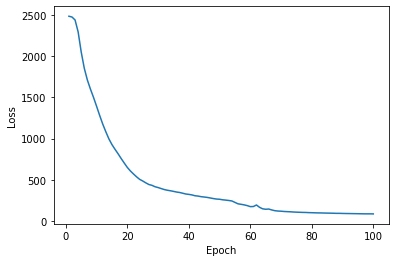

In [121]:
plt.plot(np.arange(1,max_iter+1,1), cost_arr)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### Get test set accuracy

In [122]:
def predict_y(W, b, X):
    M = X.shape[0]
    y_pred = np.zeros(M)
    for i in range(X.shape[0]):
        y_pred[i] = np.argmax(feed_forward(X[i,:].T, W, B, act_funcs))
    return y_pred

y_test_predicted = predict_y(W, B, X_test)
y_correct = y_test_predicted == y_test_indices
test_accuracy = np.sum(y_correct) / len(y_correct)

print('Test accuracy: %.4f' % (test_accuracy))

Test accuracy: 0.8887


## In-class exercise (40 points)

Modify the code above to plot both training loss and test loss as a function of epoch number.
Use early stopping to obtain the best model according to the validation set.
Experiment with the hyperparameters (learning rate, number of layers, number of units per layer) to get
the best result you can.

- Do at least 3 examples
- Plot graphs
- Tell the validation accuracy
- Describe your experiments and results in your lab report.

### EXP on Number of node in layer

epoch 1 train loss 2487.470358 validate loss 1659.383337
epoch 2 train loss 2484.686505 validate loss 1660.373416
epoch 3 train loss 2482.492301 validate loss 1655.137241
epoch 4 train loss 2475.724789 validate loss 1649.276878
epoch 5 train loss 2458.566797 validate loss 1633.009590
epoch 6 train loss 2424.377191 validate loss 1609.471040
epoch 7 train loss 2371.577394 validate loss 1565.609968
epoch 8 train loss 2296.672861 validate loss 1517.372179
epoch 9 train loss 2220.443765 validate loss 1470.190960
epoch 10 train loss 2154.370770 validate loss 1434.302131
epoch 11 train loss 2100.816882 validate loss 1406.563288
epoch 12 train loss 2057.755457 validate loss 1381.796060
epoch 13 train loss 2019.009218 validate loss 1359.205552
epoch 14 train loss 1977.330683 validate loss 1331.334484
epoch 15 train loss 1925.595805 validate loss 1300.321886
epoch 16 train loss 1873.953182 validate loss 1271.995736
epoch 17 train loss 1823.084439 validate loss 1244.896074
epoch 18 train loss 178

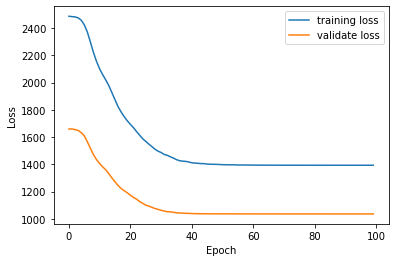

Test accuracy: 0.3796940194714882 for h1 = 2,h2 = 2
epoch 1 train loss 2487.841156 validate loss 1660.580869
epoch 2 train loss 2486.885381 validate loss 1658.503335
epoch 3 train loss 2483.892930 validate loss 1660.587643
epoch 4 train loss 2480.962343 validate loss 1653.279758
epoch 5 train loss 2468.892581 validate loss 1638.458412
epoch 6 train loss 2413.736631 validate loss 1567.586208
epoch 7 train loss 2266.902527 validate loss 1449.191593
epoch 8 train loss 2106.158727 validate loss 1359.153383
epoch 9 train loss 1987.994494 validate loss 1295.816831
epoch 10 train loss 1901.566703 validate loss 1252.322655
epoch 11 train loss 1834.320273 validate loss 1214.206345
epoch 12 train loss 1774.722020 validate loss 1181.999096
epoch 13 train loss 1720.689613 validate loss 1152.871099
epoch 14 train loss 1667.524169 validate loss 1119.309388
epoch 15 train loss 1597.599059 validate loss 1069.607467
epoch 16 train loss 1525.038595 validate loss 1026.221763
epoch 17 train loss 1451.0047

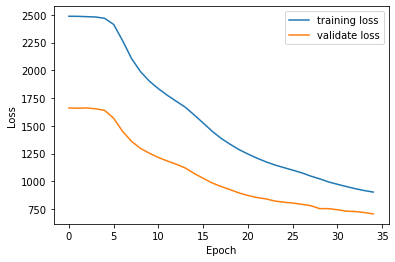

Test accuracy: 0.6244784422809457 for h1 = 4,h2 = 3
epoch 1 train loss 2486.129989 validate loss 1653.051921
epoch 2 train loss 2464.338795 validate loss 1629.790662
epoch 3 train loss 2378.381871 validate loss 1526.465744
epoch 4 train loss 2159.059267 validate loss 1352.044638
epoch 5 train loss 1886.646556 validate loss 1170.871776
epoch 6 train loss 1605.359737 validate loss 986.067072
epoch 7 train loss 1341.339382 validate loss 831.708571
epoch 8 train loss 1120.548604 validate loss 710.936631
epoch 9 train loss 943.369373 validate loss 617.960937
epoch 10 train loss 808.528338 validate loss 547.360374
epoch 11 train loss 695.042091 validate loss 486.975540
epoch 12 train loss 602.858638 validate loss 436.384466
epoch 13 train loss 523.643820 validate loss 401.509410
epoch 14 train loss 461.049450 validate loss 371.500124
epoch 15 train loss 411.027232 validate loss 346.709975
epoch 16 train loss 368.352769 validate loss 328.249074
epoch 17 train loss 336.409685 validate loss 312

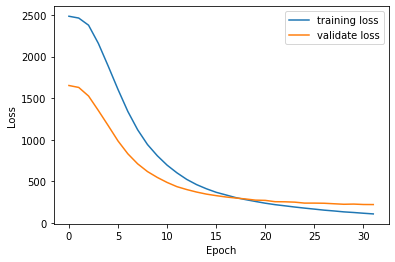

Test accuracy: 0.9165507649513213 for h1 = 8,h2 = 6


In [123]:
import random
import warnings
import copy
warnings.filterwarnings("ignore")

# Normalize each input feature

# def normalize(X):
#     M = X.shape[0]
#     XX = X - np.tile(np.mean(X,0),[M,1])
#     XX = np.divide(XX, np.tile(np.std(XX,0),[M,1]))
#     return np.nan_to_num(XX, copy=True,nan=0.0)

# XX = normalize(X)
# M = X.shape[0]
# idx = np.arange(0,M)

# # Partion data into training and testing dataset

# random.shuffle(idx)
# percent_train = .6
# m_train = int(M * percent_train)
# train_idx = idx[0:m_train]
# test_idx = idx[m_train:M+1]
# X_train = XX[train_idx,:];
# X_test = XX[test_idx,:];

# y_train = y[train_idx];
# y_test = y[test_idx];
# y_test_indices = y_indices[test_idx]

# Let's start with a 3-layer network with sigmoid activation functions,
# 6 units in layer 1, and 5 units in layer 2.



# def sigmoid_act(z):
#     return 1/(1+np.exp(-z))

# def softmax_act(z):
#     exps = np.exp(z)
#     return exps / np.sum(exps)

# def sigmoid_actder(z):
#     az = sigmoid_act(z)
#     prod = np.multiply(az,1-az)
#     return prod

# def ff(x,W,b):
#     L = len(W)-1
#     a = x
#     for l in range(1,L+1):
#         z = W[l].T*a+b[l]
#         if (l == L):
#             a = softmax_act(z)
#         else:
#             a = sigmoid_act(z)
#     return a

def loss(y, yhat):
    return - np.dot(y, np.log(yhat))


M, N = X_train.shape


h1s = [2,4,8]
h2s = [2,3,6]
for h1,h2 in zip(h1s,h2s):
    W = [[], np.random.normal(0,0.1,[N,h1]),
             np.random.normal(0,0.1,[h1,h2]),
             np.random.normal(0,0.1,[h2,10])]
    B = [[], np.random.normal(0,0.1,[h1,1]),
             np.random.normal(0,0.1,[h2,1]),
             np.random.normal(0,0.1,[10,1])]
    L = len(W)-1
    copy_w = None
    copy_b = None
    loss_tol = 10
    wait_iteration = 5
    best_val_loss = 0
    best_val_loss_idx = 0
    tolerance = 30
    # Train for 100 epochs with mini-batch size 1

    cost_arr = [] 
    val_loss_arr = []



    alpha=0.01
    max_iter = 100

    for iter in range(1, max_iter+1):
        loss_this_iter = 0
        order = np.random.permutation(M)
        for i in range(0,M):

            # Grab the pattern order[i]

            x_this = X_train[order[i],:].T
            y_this = y_train[order[i],:]
            # Feed forward step
            a, z, delta, dW, db = forward_one_step(x_this, W, B, act_funcs)

            # calulate loss
            loss_this_pattern = loss(y_this, a[L])
            loss_this_iter = loss_this_iter + loss_this_pattern

            # back propagation
            dW, db = back_propagation(y_this, a, z, W, dW, db, act_deri)

            # update weight, bias
            W, B = update_step(W, B, dW, db, alpha)



        val_loss = 0
        for i in range(X_test.shape[0]):
            
             y_val = forward_one_step(X_test[i, :].T, W, B,act_funcs)[0]
        #     getting X test to perform loss validation
             val_loss += loss(y_test[i, :], y_val[L])

        print('epoch %d train loss %f validate loss %f' % (iter, loss_this_iter, val_loss))

        if val_loss < best_val_loss or best_val_loss == 0 :
            copy_w, copy_b = copy.deepcopy(W), copy.deepcopy(b)
            best_val_loss = val_loss
            best_val_loss_idx = iter-1

        if iter>= tolerance + 1:
            if iter % wait_iteration == 0:
                alpha *= 0.5
            if val_loss > best_val_loss:
                W, b = copy_w, copy_b
                print(f'stop training at iter: {iter}')
                print(f' using best validation loss from epoch: { best_val_loss}')
                print(f'train loss : {cost_arr[best_val_loss_idx]} validate loss : {best_val_loss}')
                break

        cost_arr.append(loss_this_iter[0,0])
        # print(val_loss[0,0])
        val_loss_arr.append(val_loss[0,0])
        #     print('Epoch %d train loss %f' % (iter, loss_this_iter))
    xd = np.arange(len(cost_arr))
    plt.plot(xd, cost_arr, label='training loss')
    plt.plot(xd, val_loss_arr, label='validate loss')
    # plt.plot(np.arange(1,max_iter+1,1), cost_arr)
    # plt.plot(np.arange(1, max_iter+1,1), cost_arr, c='b')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    # Get test set accuracy

    def predict_y(W, b, X):
        M = X.shape[0]
        y_pred = np.zeros(M)
        for i in range(X.shape[0]):
            y_pred[i] = np.argmax(feed_forward(X[i,:].T, W, B, act_funcs))
        return y_pred

    y_test_predicted = predict_y(W, B, X_test)
    y_correct = y_test_predicted == y_test_indices
    test_accuracy = np.sum(y_correct) / len(y_correct)

    # print('Test accuracy: %.4f' % (test_accuracy))

    print(f'Test accuracy: {test_accuracy} for h1 = {h1},h2 = {h2}')

## Result from experiment with Number of node in each layer

- if we set node to be very low we will see that the loss is decrease quite slow.
- if we set node to be around haft of No. of classification class the loss decrease greater.
- set the node to 8 ,6 (for 2 hidden layer) the loss plot decrease quite fast, and the loss are lowest here.
- **validation accuracy** of these experiment are
    - nodes in h1 = 2,nodes in h2=2 acc = 0.30598052851182195
    - nodes in h1 = 4,nodes in h2=3 acc = 0.6689847009735744
    - nodes in h1 = 8,nodes in h2=6 acc = 0.9276773296244785

## experiment on NO. layer

In [124]:
#TODO

# raise Exception('layer implement error')

Exception: layer implement error

## Result from increase or decrease No of layer
- by decreasing, the loss tend to decrease to slower the normal (remove hidden layer 2, and relu activation f)
- with normal, use as validator
- by increasing , the result are quite bad it might due to poor dicision on activation selection.
    - ## TODO fix these

# EXP on $\alpha$

epoch 1 train loss 2498.575054 validate loss 1660.762180
epoch 2 train loss 2497.578058 validate loss 1660.378293
epoch 3 train loss 2496.629393 validate loss 1660.018755
epoch 4 train loss 2495.725492 validate loss 1659.683166
epoch 5 train loss 2494.864996 validate loss 1659.369044
epoch 6 train loss 2494.044544 validate loss 1659.076453
epoch 7 train loss 2493.263752 validate loss 1658.803418
epoch 8 train loss 2492.520045 validate loss 1658.549184
epoch 9 train loss 2491.809569 validate loss 1658.312398
epoch 10 train loss 2491.133920 validate loss 1658.091627
epoch 11 train loss 2490.488127 validate loss 1657.886002
epoch 12 train loss 2489.873286 validate loss 1657.696307
epoch 13 train loss 2489.288852 validate loss 1657.519561
epoch 14 train loss 2488.730523 validate loss 1657.356755
epoch 15 train loss 2488.197330 validate loss 1657.205597
epoch 16 train loss 2487.689673 validate loss 1657.064740
epoch 17 train loss 2487.206250 validate loss 1656.935111
epoch 18 train loss 248

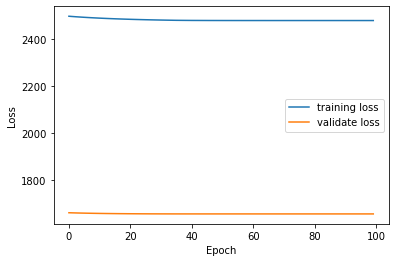

Test accuracy: 0.09735744089012517 for LR = 6.103515625e-09
epoch 1 train loss 2421.773734 validate loss 1427.937205
epoch 2 train loss 1727.126372 validate loss 934.979488
epoch 3 train loss 1236.264585 validate loss 784.368022
epoch 4 train loss 1043.541389 validate loss 667.382808
epoch 5 train loss 896.491081 validate loss 607.536590
epoch 6 train loss 765.437107 validate loss 493.938340
epoch 7 train loss 648.220204 validate loss 511.915933
epoch 8 train loss 560.432862 validate loss 429.751892
epoch 9 train loss 549.729936 validate loss 464.652771
epoch 10 train loss 545.833439 validate loss 441.448114
epoch 11 train loss 506.355378 validate loss 461.520376
epoch 12 train loss 507.893281 validate loss 432.242647
epoch 13 train loss 509.133133 validate loss 432.975619
epoch 14 train loss 471.258019 validate loss 438.582573
epoch 15 train loss 506.461620 validate loss 443.016830
epoch 16 train loss 492.775641 validate loss 563.315628
epoch 17 train loss 521.509417 validate loss 564

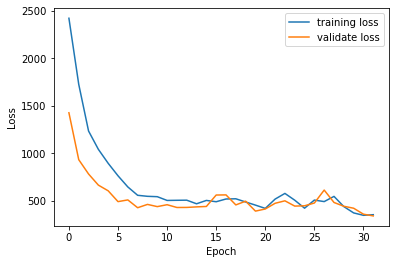

Test accuracy: 0.8929068150208623 for LR = 0.05
epoch 1 train loss 2065.136187 validate loss 892.494755
epoch 2 train loss 1125.495807 validate loss 690.564154
epoch 3 train loss 1007.258212 validate loss 734.374218
epoch 4 train loss 967.771019 validate loss 865.846834
epoch 5 train loss 859.281824 validate loss 624.949558
epoch 6 train loss 776.799803 validate loss 559.721489
epoch 7 train loss 929.819802 validate loss 691.545414
epoch 8 train loss 881.925403 validate loss 595.607432
epoch 9 train loss 776.845055 validate loss 572.679986
epoch 10 train loss 942.284227 validate loss 712.911583
epoch 11 train loss 1139.604669 validate loss 730.408001
epoch 12 train loss 1086.001025 validate loss 638.230744
epoch 13 train loss 1021.525148 validate loss 764.681206
epoch 14 train loss 997.546984 validate loss 654.727060
epoch 15 train loss 947.633124 validate loss 646.870699
epoch 16 train loss 937.403522 validate loss 707.124400
epoch 17 train loss 1162.088507 validate loss 897.816251
ep

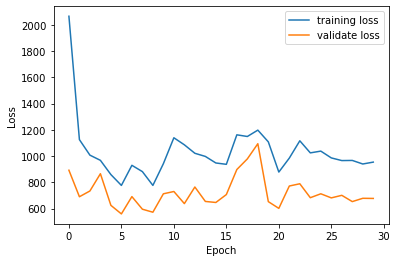

Test accuracy: 0.650904033379694 for LR = 0.1


In [125]:
def loss(y, yhat):
    return - np.dot(y, np.log(yhat))


M, N = X_train.shape


h1 = 6
h2 = 5
alphas = [0.0001,0.05,0.1]
for al_each in alphas:
    W = [[], np.random.normal(0,0.1,[N,h1]),
             np.random.normal(0,0.1,[h1,h2]),
             np.random.normal(0,0.1,[h2,10])]
    B = [[], np.random.normal(0,0.1,[h1,1]),
             np.random.normal(0,0.1,[h2,1]),
             np.random.normal(0,0.1,[10,1])]
    L = len(W)-1
    copy_w = None
    copy_b = None
    loss_tol = 10
    wait_iteration = 5
    best_val_loss = 0
    best_val_loss_idx = 0
    tolerance = 30
    # Train for 100 epochs with mini-batch size 1

    cost_arr = [] 
    val_loss_arr = []



    alpha=al_each
    max_iter = 100

    for iter in range(1, max_iter+1):
        loss_this_iter = 0
        order = np.random.permutation(M)
        for i in range(0,M):

            # Grab the pattern order[i]

            x_this = X_train[order[i],:].T
            y_this = y_train[order[i],:]
            # Feed forward step
            a, z, delta, dW, db = forward_one_step(x_this, W, B, act_funcs)

            # calulate loss
            loss_this_pattern = loss(y_this, a[L])
            loss_this_iter = loss_this_iter + loss_this_pattern

            # back propagation
            dW, db = back_propagation(y_this, a, z, W, dW, db, act_deri)

            # update weight, bias
            W, B = update_step(W, B, dW, db, alpha)



        val_loss = 0
        for i in range(X_test.shape[0]):
            
             y_val = forward_one_step(X_test[i, :].T, W, B,act_funcs)[0]
        #     y_val = np.array(y_val).flatten()
             val_loss += loss(y_test[i, :], y_val[L])

        print('epoch %d train loss %f validate loss %f' % (iter, loss_this_iter, val_loss))

        if val_loss < best_val_loss or best_val_loss == 0 :
            copy_w, copy_b = copy.deepcopy(W), copy.deepcopy(b)
            best_val_loss = val_loss
            best_val_loss_idx = iter-1

        if iter>= tolerance + 1:
            if iter % wait_iteration == 0:
                alpha *= 0.5
            if val_loss > best_val_loss:
                W, b = copy_w, copy_b
                print(f'stop training at iter: {iter}')
                print(f' using best validation loss from epoch: { best_val_loss}')
                print(f'train loss : {cost_arr[best_val_loss_idx]} validate loss : {best_val_loss}')
                break

        cost_arr.append(loss_this_iter[0,0])
        # print(val_loss[0,0])
        val_loss_arr.append(val_loss[0,0])
        #     print('Epoch %d train loss %f' % (iter, loss_this_iter))
    xd = np.arange(len(cost_arr))
    plt.plot(xd, cost_arr, label='training loss')
    plt.plot(xd, val_loss_arr, label='validate loss')
    # plt.plot(np.arange(1,max_iter+1,1), cost_arr)
    # plt.plot(np.arange(1, max_iter+1,1), cost_arr, c='b')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    # Get test set accuracy

    def predict_y(W, b, X):
        M = X.shape[0]
        y_pred = np.zeros(M)
        for i in range(X.shape[0]):
            y_pred[i] = np.argmax(feed_forward(X[i,:].T, W, B, act_funcs))
        return y_pred

    y_test_predicted = predict_y(W, B, X_test)
    y_correct = y_test_predicted == y_test_indices
    test_accuracy = np.sum(y_correct) / len(y_correct)

    # print('Test accuracy: %.4f' % (test_accuracy))

    print(f'Test accuracy: {test_accuracy} for LR = {alpha}')

## Result from experiment with learning rate
- Learning rate that I use are [0.0001,0.05,0.1]
    - For 0.0001 > seem like it too low of the learing rate It not furture improve after fifth epoch
        - Since alpha are changable, the last alpha are not .0001 anymore
    - For 0.05 > It seem ok but for the deep learing the learning rate tend to not smoothly learn
    - For 0.1 > seem like it to high rate at same epoch it tend to be worse than 0.05
- Here is the **validation accuracy** by learning Rate
    - LR = 0.001 acc = 0.090403337969401951<br>
    - LR = 0.05 acc = 0.9248956884561892<br>
    - LR = 0.1 acc = 0.7023643949930459<br>

### Summary
- From **6** experiments on Learning rate and No of node in each layer:
    - **No of node**
    - increase node give better learning, observe from graph and accuracy at the same ecpoch ( quite not the same since we use early stop)
        - also it learing faster
    - **LR**
    - on LR setting L = 0.000 > is too low the model barely learn nothing
    - setting LR = 0.1 or above is too high accuracy and cost plot as worse than 0.01 or 0.05

## PyTorch tutorial

Is there an easier way to build this type of model? One way is to learn a framework such as TensorFlow or PyTorch. Both of these frameworks have their
pros and cons, but PyTorch is probably the most productive neural network framework for research purposes. We'll use it here.

The material for this tutorial is from
[Anand Saha's PyTorch tutorial](https://github.com/anandsaha/deep.learning.with.pytorch).

### Tensors and Tensor operations

Let's get some hands on experience with tensor creation and operations.
The torch package contains the necessary data structures to create multidimensional tensors.
It also defines the mathematical operations that can be performed on these.

In [126]:
import torch

In [127]:
print(torch.__version__)

1.10.1+cu102


### Tensor creation

Create a (2x3) dimentional Tensor.

Note that a) You get back a FloatTensor b) The values are uninitialized

In [128]:
t = torch.Tensor(2, 3)
print(t)

tensor([[3.5516e+27, 4.5895e-41, 3.5516e+27],
        [4.5895e-41, 9.9511e+26, 4.5895e-41]])


The above call was equivalent to

In [129]:
t = torch.FloatTensor(2, 3)
print(t)

tensor([[-1.3407e+13,  3.0915e-41, -1.4614e+13],
        [ 3.0915e-41,  1.7917e+25,  3.0096e+32]])


Inspect type of an element

In [130]:
t[0][0]

tensor(-1.3407e+13)

In [131]:
type(t[0][0])

torch.Tensor

Inspect `t`'s dimensions

In [132]:
print(t.size())
print(t.dim())
print(len(t.size()) == t.dim())

torch.Size([2, 3])
2
True


Set values

In [133]:
t[0][0] = 1
t[0][1] = 2
t[0][2] = 3
t[1][0] = 4
t[1][1] = 5
t[1][2] = 6
print(t)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


Let's cast a FloatTensor to IntTensor

In [134]:
t = torch.FloatTensor([1.1, 2.2])
print(t)
t.type(torch.IntTensor)

tensor([1.1000, 2.2000])


tensor([1, 2], dtype=torch.int32)

Let's explore some other ways of creating a tensor

In [135]:
# From another Tensor

t2 = torch.Tensor(t)
print(t2)

tensor([1.1000, 2.2000])


In [136]:
# From a Python list

t3 = torch.IntTensor([[1, 2],[3, 4]])
print(t3)

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [137]:
# From a NumPy array

import numpy as np
a = np.array([55, 66])
t4 = torch.Tensor(a)
print(t4)

tensor([55., 66.])


In [138]:
# Create a Tensor with all zeros

t5 = torch.zeros(2, 3)
print(t5)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [139]:
# Create a Tensor with all ones

t6 = torch.ones(2, 3)
print(t6)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [140]:
# Create a Tensor with all ones with dimensions 
# of another Tensor

t7 = torch.ones_like(t4)
print(t7)

tensor([1., 1.])


### Tensor operations

Add two Tensors

In [141]:
t1 = torch.ones(2, 2)
t2 = torch.ones(2, 2)
t = t1 + t2
print(t)

tensor([[2., 2.],
        [2., 2.]])


Inplace/out-of-place operations

In [142]:
t1.add(t2)

tensor([[2., 2.],
        [2., 2.]])

In [143]:
print(t1)

tensor([[1., 1.],
        [1., 1.]])


In [144]:
t1.add_(t2)

tensor([[2., 2.],
        [2., 2.]])

In [145]:
print(t1)

tensor([[2., 2.],
        [2., 2.]])


Class methods and package functions

In [146]:
t1.cos()

tensor([[-0.4161, -0.4161],
        [-0.4161, -0.4161]])

In [147]:
torch.cos(t1)

tensor([[-0.4161, -0.4161],
        [-0.4161, -0.4161]])

A few more operations

In [148]:
# Create a one-dimensional tensor of steps equally 
# spaced points between start and end

torch.linspace(3, 10, steps=5)

tensor([ 3.0000,  4.7500,  6.5000,  8.2500, 10.0000])

In [149]:
# Create a 1-D Tensor with values from [start, end)

torch.arange(0, 5)

tensor([0, 1, 2, 3, 4])

In [150]:
# Create a (2x3) Tensor with random values sampled 
# from uniform distrubution on the interval [0,1)

torch.rand((2,3))

tensor([[0.9095, 0.8855, 0.4139],
        [0.7071, 0.3367, 0.2887]])

In [151]:
# Create a (2x3) Tensor with random values sampled 
# from normal distrubution with 0 mean and variance 1

torch.randn((2,3))

tensor([[-1.0019,  0.5615,  0.6346],
        [-0.6756,  0.4115, -0.6400]])

In [152]:
# Do a matrix multiply

a = torch.rand((2, 3))
b = torch.rand((3, 2))

torch.mm(a, b)

tensor([[1.0360, 0.8461],
        [1.4634, 1.2437]])

### Variables

Next, let's understand variables in PyTorch and the operations we can perform on them.

In [153]:
import torch
from torch.autograd import Variable

Let's create a small computation graph

In [154]:
x = Variable(torch.FloatTensor([11.2]), requires_grad=True)
y = 2 * x

In [155]:
print(x)
print(y)

tensor([11.2000], requires_grad=True)
tensor([22.4000], grad_fn=<MulBackward0>)


In [156]:
print(x.data)
print(y.data)

tensor([11.2000])
tensor([22.4000])


In [157]:
print(x.grad_fn)
print(y.grad_fn)

None


In [158]:
y.backward() # Calculates the gradients

In [159]:
print(x.grad)
print(y.grad)

tensor([2.])
None


### Working with PyTorch and NumPy

In [160]:
import torch
import numpy as np

Convert a NumPy array to Tensor

In [161]:
n = np.array([2, 3])
t = torch.from_numpy(n)
print(n)
print(t)

[2 3]
tensor([2, 3])


Change a Tensor value, and see the change in 
corresponding NumPy array

In [162]:
n[0] = 100
print(t)

tensor([100,   3])


Convert a Tensor to NumPy array

In [163]:
t = torch.FloatTensor([5, 6])
n = t.numpy()
print(t)
print(n)

tensor([5., 6.])
[5. 6.]


Change a Tensor value, and see the change in corresponding NumPy array

In [164]:
t[0] = 100
print(n)

[100.   6.]


### Tensors on GPU

Check if your machine has GPU support

In [165]:
if torch.cuda.is_available():
    print("GPU Supported")
else:
    print("GPU Not Supported")

GPU Supported


Check the number of GPUs attached to this machine

In [166]:
torch.cuda.device_count()

4

Get device name

In [167]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 2080 Ti'

Moving a Tensor to GPU

In [168]:
t = torch.FloatTensor([2, 3])

In [169]:
print(t)

tensor([2., 3.])


In [170]:
t = t.cuda(0)

Creating a Tensor on GPU, directly

In [171]:
t = torch.cuda.FloatTensor([2, 3])
print(t)

tensor([2., 3.], device='cuda:0')


Bring it back to CPU

In [172]:
t = t.cpu()
print(t)

tensor([2., 3.])


Use device context

In [173]:
with torch.cuda.device(0):
    t = torch.cuda.FloatTensor([2, 3])
    print(t)

tensor([2., 3.], device='cuda:0')



## MNIST digit recognition using PyTorch

This part of the lab was
taken from the [Kaggle tutorial on MNIST with PyTorch]('https://www.kaggle.com/justuser/mnist-with-pytorch-fully-connected-network).

We will use a fully connected neural network and a batch learning algorithm and explain each
step along the way.

So, with that being said, let's start with imports that we will need.
First of all, we need to import PyTorch. There are some common names for torch modules (like numpy is always named np):  torch.nn.functional is imported as F,  torch.nn is the core module, and is simply imported as nn.
Also, we need numpy. We also use pyplot and seaborn for visualization, but they are not required for the network itself. 
And finally, we use pandas for importing and transforming data.


In [174]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Now we can import and transform the data. I decided to split it into input and labels right away at this step:

In [175]:
print("Reading the data...")
data = pd.read_csv('train_mnist.csv', sep=",")
test_data = pd.read_csv('test_mnist.csv', sep=",")

print("Reshaping the data...")
dataFinal = data.drop('label', axis=1)
labels = data['label']


dataNp = dataFinal.to_numpy()
labelsNp = labels.to_numpy()
test_dataNp = test_data.to_numpy()

print("Data is ready")

Reading the data...
Reshaping the data...
Data is ready


Now that data is ready, we can take a look at what we're dealing with. I will be using heatmaps from seaborn, which is an excellent tool for matrix visualization. But first, since the images in the MNIST dataset are represented as a long 1d arrays of pixels, we will need to reshape it into 2d array. That's where .reshape() from numpy comes in handy. The pictures are 28 x 28 pixels, so these will be the parameters.

Let's select a couple random samples and visualize them. I will also print their labels, so we can compare images with their actual value:

8  /  9
8  /  4
9  /  1


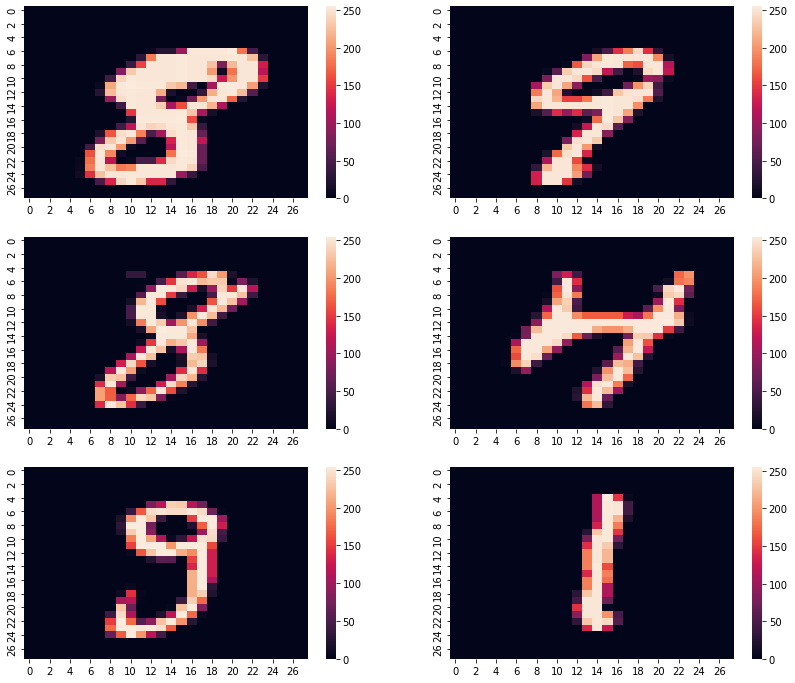

In [176]:
plt.figure(figsize=(14, 12))

pixels = dataNp[10].reshape(28, 28)
plt.subplot(321)
sns.heatmap(data=pixels)

pixels = dataNp[11].reshape(28, 28)
plt.subplot(322)
sns.heatmap(data=pixels)

pixels = dataNp[20].reshape(28, 28)
plt.subplot(323)
sns.heatmap(data=pixels)

pixels = dataNp[32].reshape(28, 28)
plt.subplot(324)
sns.heatmap(data=pixels)

pixels = dataNp[40].reshape(28, 28)
plt.subplot(325)
sns.heatmap(data=pixels)

pixels = dataNp[52].reshape(28, 28)
plt.subplot(326)
sns.heatmap(data=pixels)

print(labels[10], " / ", labels[11])
print(labels[20], " / ", labels[32])
print(labels[40], " / ", labels[52])

PyTorch has it's own way to store data - those are called tensors, and they are just like numpy arrays, but are suited for PyTorch needs. If we want to feed the data to the network, we need to transform the dataset into those tensors. The good news is that PyTorch can easily do that by transforming numpy arrays or regular lists into tensors.

In [177]:
x = torch.FloatTensor(dataNp.tolist())
y = torch.LongTensor(labelsNp.tolist())

Before we start writing the actual network, we need to determine what will be the hyperparameters. Those will not be adjusted during training, so we need to be careful how we set them up. 

Here's what we will specify:
* **input_size** - size of the input layer, it is always fixed (784 pixels)
* **output_size** - size of the output layer, also fixed size (10 for every possible digit)
* **hidden_size** - size of the hidden layer, this parameter determines structure of the network. 200 worked for me, but it is worth to play with this parameter to see what works for you
* **epochs** - how many times will the network go through the entire dataset during training. 
* **learning_rate** - determines how fast will the network learn. You should be very careful about this parameter, because if it is too high, the network won't learn at all, if it is too low, the net will learn too long. I's always about balance. Usualy 10^-3 - 10^-5 works just fine.
* **batch_size** - size of mini batches during training

In [178]:
# hyperparameters
input_size = 784
output_size = 10
hidden_size = 200

epochs = 20
batch_size = 50
learning_rate = 0.00005

Now we can finally write the actual network. To make it all work, the Network class needs to inherit the *nn.Module*, which gives it the basic functionality required, and allows PyTorch to work with it as expected. 

When writing a PyTorch neural network, some things must always be there:
* \__init\__(self) - initializes the net and creates an instance of that *nn.Module*. Here we define the structure of the network.
* forward(self, x) - defines forward propagation and how the data flow through the network. Of course, it is based on the structure that is defined in the previous function.

In the initialization, first of all, we need to initialize super (or base) module that the net inherits. After that first line, is the definition of structure. You can experiment with (put more layers or change hidden layer size, etc.), but this structure worked for me just fine.

In forward propagation we simply reassign the value of x as it flows through the layers and return the [softmax](https://en.wikipedia.org/wiki/Softmax_function) at the end.

In [179]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l3(x)
        return F.log_softmax(x)

After we've defined the network, we can initialize it. 
Also, if we "print" the instance of the net, we can see the structure of it in a neat format:

In [180]:
net = Network()
print(net)

Network(
  (l1): Linear(in_features=784, out_features=200, bias=True)
  (relu): ReLU()
  (l3): Linear(in_features=200, out_features=10, bias=True)
)


Now it's time to set up the [optimizer](http://pytorch.org/docs/master/optim.html) and a loss function. 

*There are quite a lot of things happening behind these two lines of code, so if you don't know what is going on here, don't worry too much for now, it will get clearer eventualy.* 

Optimizer is what  updates the parameters of the network. I will be using Stochastic Gradient Descent with momentum. Also, the optimizer takes the network parameters as an argument, but it's not a big deal since we can get those with .parameters() function.

I decided to use [Cross Entropy Loss](https://en.wikipedia.org/wiki/Cross_entropy) for this problem, but again, there are many options and you are free to choose whatever suits you best.

In [181]:
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
loss_func = nn.CrossEntropyLoss()

Now that everything is ready, our network can start learning. I will separate data into minibatches and feed it to the network. It has many advantages over single batch learning, but that is a different story. 

Also, I will use loss_log list to keep track of the loss function during the training process. 

In [182]:
loss_log = []

for e in range(epochs):
    for i in range(0, x.shape[0], batch_size):
        x_mini = x[i:i + batch_size] 
        y_mini = y[i:i + batch_size] 
        
        x_var = Variable(x_mini)
        y_var = Variable(y_mini)
        
        optimizer.zero_grad()
        net_out = net(x_var)
        
        loss = loss_func(net_out, y_var)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            loss_log.append(loss.item())
        
    print('Epoch: {} - Loss: {:.6f}'.format(e, loss.item()))

Epoch: 0 - Loss: 0.012917
Epoch: 1 - Loss: 0.012866
Epoch: 2 - Loss: 0.005691
Epoch: 3 - Loss: 0.002828
Epoch: 4 - Loss: 0.002201
Epoch: 5 - Loss: 0.001978
Epoch: 6 - Loss: 0.001685
Epoch: 7 - Loss: 0.001471
Epoch: 8 - Loss: 0.001311
Epoch: 9 - Loss: 0.001076
Epoch: 10 - Loss: 0.000959
Epoch: 11 - Loss: 0.000878
Epoch: 12 - Loss: 0.000714
Epoch: 13 - Loss: 0.000638
Epoch: 14 - Loss: 0.000546
Epoch: 15 - Loss: 0.000535
Epoch: 16 - Loss: 0.000473
Epoch: 17 - Loss: 0.000461
Epoch: 18 - Loss: 0.000423
Epoch: 19 - Loss: 0.000387


So, let's go line by line and see what is happening here:

This is the main loop that goes through all the epochs of training. An epoch is one full training on the full dataset.

    for e in range(epochs):
This is the inner loop that simply goes through the dataset batch by batch:

    for i in range(0, x.shape[0], batch_size):
Here is where we get the batches out of our data and simply assign them to variables for further work:

    x_mini = x[i:i + batch_size] 
    y_mini = y[i:i + batch_size] 
   These two lines are quite *important*. Remember I told you about tensors and how PyTorch stores data in them? That's not the end of story. Actually, to allow the network to work with data, we need a wrapper for those tensors called Variable. It has some additional properties, like allowing automatic gradient computation when backpropagating. It is required for the proper work of PyTorch, so we will add them here and supply tensors as parameters:
   
    x_var = Variable(x_mini)
    y_var = Variable(y_mini)
This line just resets the gradient of the optimizer:
    
    optimizer.zero_grad()
Remember the *forward(self, x)* function that we previously defined? The next line is basically calling this function and does the forward propagation:

    net_out = net(x_var)
This line computes the loss function based on predictions of the net and the correct answers:

    loss = loss_func(net_out, y_var)
Here we compute the gradient based on the loss that we've got. It will be used to adjust parameters of the network.

    loss.backward()
And here is where we finally update our network with new adjusted parameters:

    optimizer.step()
The rest is just logging, which might be helpful to observe how well the network is performing.

After the network is done with training, we can take a look at the loss function, and how it behaved during training:

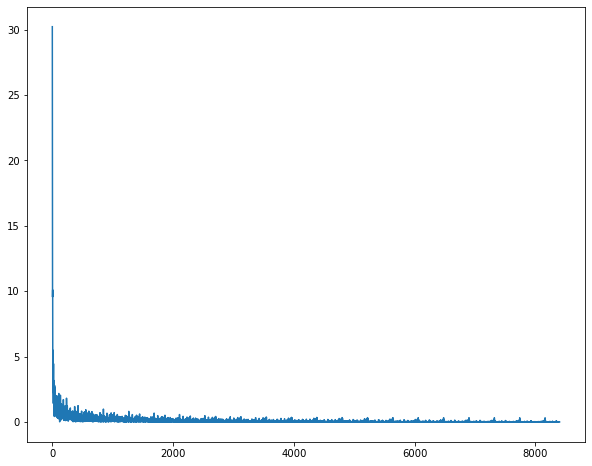

In [183]:
plt.figure(figsize=(10,8))
plt.plot(loss_log)

At this point, the network should be trained, and we can make a prediction using the test dataset. All we need to do is wrap the data into the Variable and feed it to the trained net, so nothing new here.

In [184]:
test = torch.FloatTensor(test_dataNp.tolist())
test_var = Variable(test)

net_out = net(test_var)

print(torch.max(net_out.data, 1)[1].numpy())

[2 0 9 ... 3 9 2]


Now we have out predictions that are ready to be submitted. Before that, we can take a look at predictions and compare them to the actual pictures of digits, just like at the start with training data:

Prediction: 0 / 5
Prediction: 9 / 7
Prediction: 0 / 8


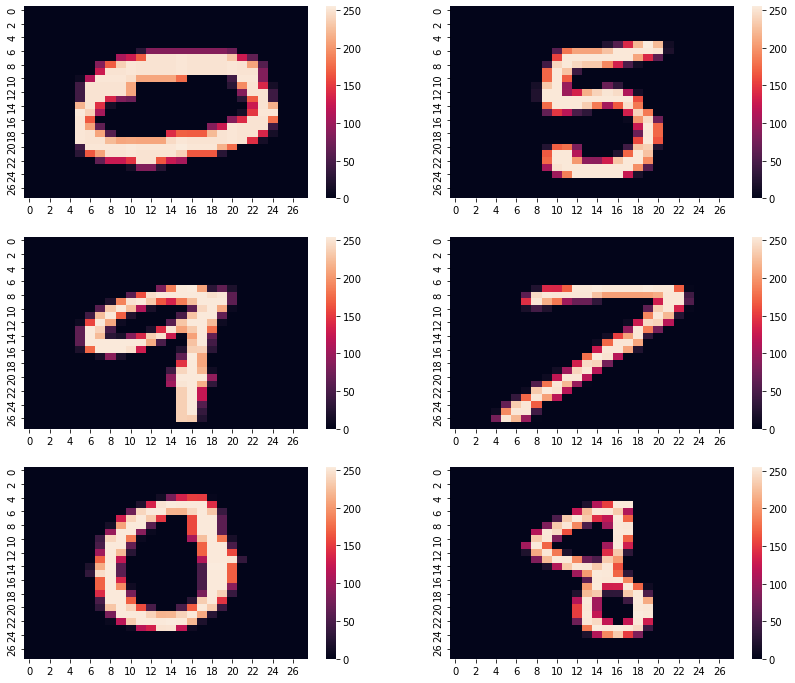

In [185]:
plt.figure(figsize=(14, 12))

pixels = test_dataNp[1].reshape(28, 28)
plt.subplot(321)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[1].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[10].reshape(28, 28)
plt.subplot(322)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[10].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[20].reshape(28, 28)
plt.subplot(323)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[20].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[30].reshape(28, 28)
plt.subplot(324)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[30].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[100].reshape(28, 28)
plt.subplot(325)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[100].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[2000].reshape(28, 28)
plt.subplot(326)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[1].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)


print("Prediction: {} / {}".format(torch.max(net_out.data, 1)[1].numpy()[1], torch.max(net_out.data, 1)[1].numpy()[10]))
print("Prediction: {} / {}".format(torch.max(net_out.data, 1)[1].numpy()[20], torch.max(net_out.data, 1)[1].numpy()[30]))
print("Prediction: {} / {}".format(torch.max(net_out.data, 1)[1].numpy()[100], torch.max(net_out.data, 1)[1].numpy()[2000]))

In [186]:
output = (torch.max(net_out.data, 1)[1]).numpy()
#np.savetxt("out.csv", np.dstack((np.arange(1, output.size+1),output))[0],"%d,%d",header="ImageId,Label")

And that is about it, we've made a simple neural network using PyTorch that can recognize handwritten digits. Not so bad!

When I was writing this notebook, this model scorred 96.6%, which is not perfect by any means, but it's not that bad either. 

I hope this was useful for some of you. If you are totally new to deep learning, I suggest you learn how the neural networks actually work from the inside, especially the backpropagation algorithm.

These videos explain [neural nets](https://www.youtube.com/watch?v=aircAruvnKk&t=708s) and [backpropagation](https://www.youtube.com/watch?v=Ilg3gGewQ5U) quite well.

Also I suggest you to take a look at this [online book](http://neuralnetworksanddeeplearning.com/chap1.html) (it's absolutely free, btw), where neural networks are explained in great detail, and it even has an implementation of the MNIST problem from scratch, using only numpy.

If you have any feedback, feel free to leave comments down below, and good luck with your deep learning adventures :)

## Take-home exercise (50 points)

Make sure you can run the PyTorch examples of MNIST classification, then apply the PyTorch example to another
classification problem you've worked with this semester, for example the breast cancer dataset. Get familiar with
working with models in PyTorch.

Report your experiments and results in your brief lab report.

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("breast_cancer.csv")
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [188]:
X = data.drop(columns=['id','Unnamed: 32','diagnosis'])
y = data['diagnosis']
y, unique_y = pd.factorize(y)
X_columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

### getting input and output shape// size 

In [189]:
X_train_tensor.size()

torch.Size([455, 30])

In [190]:
y_train_tensor.size()

torch.Size([455])

In [191]:
# Your code here

input_size = 30
output_size = 2 # 0 and 1
hidden1_size = 50
#hidden2_size = None
#hidden3_size = None
#hidden4_size = None

epochs = 10
batch_size = 25
learning_rate = 0.005

## model network,optimizer,loss f implementing 

In [192]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        ### BEGIN SOLUTION
        self.l1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.l3 = nn.Linear(hidden1_size, output_size)
        ### END SOLUTION
        
    def forward(self, x):
        ### BEGIN SOLUTION
        x = self.l1(x)
        x = self.relu1(x)
        x = self.l3(x)
        return F.softmax(x)
        ### END SOLUTION

In [193]:
# Continue yourself
mode_l = Network()
print(mode_l)



Network(
  (l1): Linear(in_features=30, out_features=50, bias=True)
  (relu1): ReLU()
  (l3): Linear(in_features=50, out_features=2, bias=True)
)


In [194]:
optimizer = optim.Adam(mode_l.parameters(), lr=learning_rate)
loss_func = nn.CrossEntropyLoss()

## fitting

In [195]:
loss_log = []

for e in range(epochs):
    for i in range(0, X_train_tensor.shape[0], batch_size):
        x_mini = X_train_tensor[i:i + batch_size] 
        y_mini = y_train_tensor[i:i + batch_size]
        
        net_out = mode_l(x_mini)
        # print(net_out,y_mini)
        loss = loss_func(net_out, y_mini)
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()
        
        # if i % 100 == 0:
        loss_log.append(loss.item())
        
    print('Epoch: {} - Loss: {:.6f}'.format(e, loss.item()))

Epoch: 0 - Loss: 0.373992
Epoch: 1 - Loss: 0.324468
Epoch: 2 - Loss: 0.317469
Epoch: 3 - Loss: 0.315777
Epoch: 4 - Loss: 0.314954
Epoch: 5 - Loss: 0.314474
Epoch: 6 - Loss: 0.314184
Epoch: 7 - Loss: 0.313990
Epoch: 8 - Loss: 0.313862
Epoch: 9 - Loss: 0.313742


## loss plot

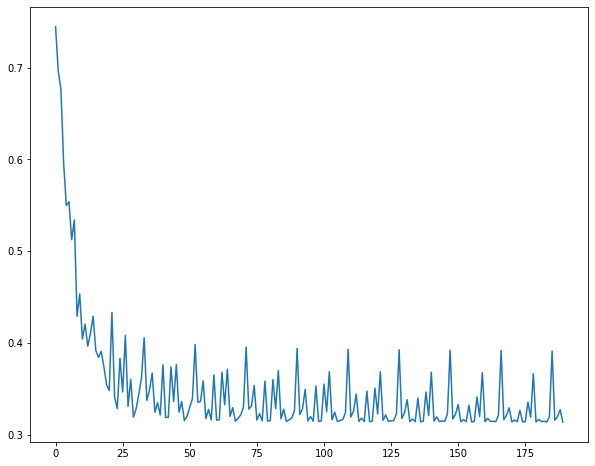

In [196]:
plt.figure(figsize=(10,8))
plt.plot(loss_log)

In [197]:
print(y_test_tensor.numpy())

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [198]:
net_out = mode_l(X_test_tensor)

print(torch.max(net_out.data, 1)[1].numpy())
pred_data = torch.max(net_out.data, 1)[1].numpy()

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [199]:
accuracy = (pred_data == y_test_tensor.numpy()).sum() / pred_data.shape[0] * 100


In [200]:
print(f'Testing accuracy = {accuracy}')

Testing accuracy = 98.24561403508771


<h1>Summary,</h1>

- Studying hyperparemeter part 
    - From **6** experiments on Learning rate and No of node in each layer:
        - **No of node**
        - increase node give better learning, observe from graph and accuracy at the same ecpoch ( quite not the same since we use early stop)
            - also it learing faster
        - **LR**
        - on LR setting L = 0.000 > is too low the model barely learn nothing
        - setting LR = 0.1 or above is too high accuracy and cost plot as worse than 0.01 or 0.05

- take home part
    - Breast canser dataset classification using pytorch
    - the model using here are
    
``` python
Network(
  (l1): Linear(in_features=30, out_features=50, bias=True)
  (relu1): ReLU()
  (l3): Linear(in_features=50, out_features=2, bias=True)
        )

```

- optimizer and loss func

``` python
optimizer = optim.Adam(mode_l.parameters(), lr=learning_rate)
loss_func = nn.CrossEntropyLoss()
```

- takehome cont
    
    - With batchsize of 25 and 9 epoch, the accuracy getting from this model is  `Testing accuracy = 99.12280701754386`